<h1 style="text-align: center; vertical-align: middle;">Numerical Methods of Accelerator Physics</h1>
<h2 style="text-align: center; vertical-align: middle;">Lecture by Dr. Adrian Oeftiger</h2>

<img src="./img/etit.png" style="width: 20%; margin: auto;" />

<h3 style="text-align: center; vertical-align: middle;">Part 2: 28.10.2022</h3>

<h2>Run this notebook online!</h2>

Interact and run this jupyter notebook online via mybinder:

[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/aoeftiger/TUDa-NMAP-02/v1.0)

Also find this lecture rendered [on github $\nearrow$](https://aoeftiger.github.io/TUDa-NMAP-02/) along with the [source repository $\nearrow$](https://github.com/aoeftiger/TUDa-NMAP-02).

<h2>Since last week</h2>

- jupyter notebooks on your devices?
- experience with running them online in mybinder?
- local TU Darmstadt resources: jupyter hub (require TU IDs!)

<h3>Announcements</h3>

- starting flipped classroom after next week
- first video material: lecture part 4, available Monday 7.11.2022

<h2 style="color: #b51f2a">Refresher!</h2>

- accelerators $=$ $1 + \epsilon$ $=$ single-particle dynamics + perturbative multi-particle dynamics
- bending and focusing concept
- linacs vs. cyclotrons vs. synchrotrons
- synchrotron time scales: transverse oscillations vs. longitudinal oscillations vs. storage time
---
- phase space
- equations of motion and the Hamiltonian
- discrete integration
- Liouville theorem, symplecticity

<h2 style="color: #b51f2a">Today!</h2>

1. RMS Emittance and Preservation
2. Discrete Frequency Analysis

<h2>Maxwell Equations</h2>

Beam $=$ ensemble of particles

$\leadsto$ particles subject to electromagnetic fields $\implies$ 3D Maxwell equations

in Cartesian coordinates:

$$\begin{align}\,
    &(1) & \nabla \cdot \mathbf{E} &= \frac{\rho}{\epsilon_0} \\
    &(2) & \nabla \times \mathbf{E} + \frac{\partial\mathbf{B}}{\partial t} &= \mathbf{0} \\
    &(3) & \nabla \cdot \mathbf{B} &= 0 \\
    &(4) & \nabla \times \mathbf{B} - \frac{1}{c^2} \frac{\partial\mathbf{E}}{\partial t} &=  \mu_0 \mathbf{j}
\end{align}$$

<h2>Coordinate System in Accelerators</h2>

<img src="./img/frenet-serret.png" alt="Frenet-Serret coordinate system accelerator" style="float: right; width: 25%;" />

<b>Reference orbit</b>: ideal trajectory through magnets in accelerator

<b>Path length</b> $s$: independent time-like parameter following reference particle with momentum $p_0=\beta\gamma m_0 c$ in longitudinal direction

Particle 3D position in accelerator is measured as <b>3D offset</b> from the reference orbit position at path length $s$:

$$(x,y,z)$$

$$\begin{align}
    x& \text{:  horizontal offset [m]} \\
    y& \text{:  vertical offset [m]} \\
    z& \text{:  longitudinal offset [m]}
\end{align}$$

<h2>Conjugate Momenta</h2>

Longitudinal momentum in the direction of motion $p_z$.

Transverse momenta $P_x, P_y$ are typically expressed as trajectory slopes:
$$\begin{align}\,
    x' &\doteq \frac{dx}{ds} = \frac{P_x}{p_z}  \\
    y' &\doteq \frac{dy}{ds} = \frac{P_y}{p_z}
\end{align}$$

$\leadsto$ <b>Paraxial approximation</b>: $x'\ll 1,~ y'\ll 1,~ p_z\approx p_0$

$\implies$ measure $p_z$ as momentum offset from $p_0$: $\delta = \frac{p_z - p_0}{p_0}$

<h2>6D Phase Space</h2>

A point particle $\implies$ occupies a point in 6D phase space:

$$\zeta = \begin{pmatrix} x \\ x' \\ y \\ y' \\ z \\ \delta \end{pmatrix}$$

In typical synchrotron situations: horizontal $(x,x')$, vertical $(y,y')$ and longitudinal $(z,\delta)$ phase space are <b>decoupled</b>!

$\implies$ will study when this approximation applies during derivation of reduced transverse and longitudinal models!

<img src="./img/leir-layout.png" alt="CERN LEIR layout" style="float:right; width:35%;" />

<h2>Analogy of Pendulum with Accelerator</h2>

Longitudinal phase focusing with rf cavities:
- particles drift over most of the circular accelerator
- particles get kicked only in rf cavities <br /> (energy change through standing electromagnetic wave)

$\implies$ closely corresponds to discrete pendulum situation!

<div class="alert alert-block alert-success" style="text-align:center;">rf focused beam of particles $\leftrightarrow$ <b>collection</b> of pendulums </div>


<p style="clear: both; font-size: 10pt; text-align: right; float: right;"><a href="https://be-dep-op-leir.web.cern.ch/content/leir-machine">image: LEIR layout, CERN</a></p>

<h2>Let's simulate collection of pendulums</h2>

<!--<h2>Longitudinal Equations of Motion</h2>

Connection to full rf cavities will be derived later in semester:

$$\begin{align}\,
    z_{k+1/2} &= z - \frac{C}{2} \eta \delta \\
    \delta_{k+1} &= \
\end{align}$$

def track(z, dp):
    # half drift
    z = z - eta * dp * circumference / 2
    # rf kick
    amplitude = rfb.charge * voltage / (beta * c * rfb.p0)
    phi = harmonic * (2 * np.pi * z / circumference) + rfb.phi_offset_list[0]
    dp += amplitude * np.sin(phi)
    # half drift
    z = z - eta * dp * circumference / 2
    return z, dp
-->

In [1]:
from config import (np, plt, hamiltonian, 
                    plot_hamiltonian, solve_leapfrog, 
                    get_boundary_ids, set_axes,
                    plot_macro_evolution, dt)
%matplotlib inline

Create distribution of initial conditions $(\theta_i, p_i)$ for the pendulum (like a beam of $N$ particles):

In [2]:
theta_grid = np.linspace(-0.5 * np.pi, 0.5 * np.pi, 21)
p_grid = np.linspace(-0.3, 0.3, 5)

thetas, ps = np.meshgrid(theta_grid, p_grid)

In [3]:
N = len(theta_grid) * len(p_grid)
N

105

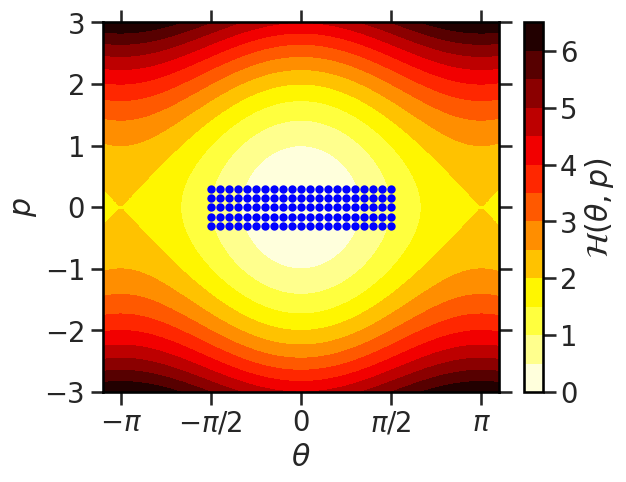

In [4]:
plt.scatter(thetas, ps, c='b', marker='.')

plot_hamiltonian()

$\implies$ rectangular distribution (reminds of a beam pulse injected from a linac)

<h2>Beam Emittance</h2>

<img src="./img/tomo.png" alt="Tomographic reconstruction of longitudinal phase space at CERN PS by Adrian Oeftiger" style="float:right; height: 80%; padding-left:1em;" />

Beam distribution: $10^{11}...10^{13}$ particles

<!--$\implies$ at given time instant particles occupy different states $(\theta, p)$-->

<div class="alert alert-block alert-success" style="text-align:center;">$\leadsto$ refer to extent of distribution in phase space as <b>emittance</b> <br />$\epsilon=$ rms of all particle amplitudes!</div>

<h2>Moment of a distribution</h2>

Measure statistical moments of a distribution of $N$ particles/states in phase space:

$$\langle f(\zeta) \rangle \doteq \frac{1}{N}\sum\limits_i^N f(\zeta_i)$$

where $f$ is a monomial of the phase-space coordinates, e.g.

$$\begin{cases}
    \langle x \rangle: & \text{horizontal centroid (centre-of-mass)} \\
    \sigma_y = \sqrt{\left\langle \bigl(y - \langle y \rangle \bigr)^2\right\rangle} = \sqrt{\langle y^2 \rangle - \langle y\rangle^2}: & \text{vertical rms beam size}
\end{cases}$$

$\implies$ what is the moment order of $\langle x\rangle$ or $\sigma_y$?

<h2>Statistical RMS Emittance</h2>

Measure <b>extent</b> of distribution in phase space via $\Sigma$-matrix, the covariance matrix of second-order moments, e.g. for horizontal phase space (assume for simplicity $\langle x\rangle=\langle x'\rangle=0$):

$$\Sigma_x = \begin{pmatrix}
    \langle x^2\rangle & \langle x\,x'\rangle \\
    \langle x\,x'\rangle & \langle x'{}^2\rangle \\
\end{pmatrix}$$

$\implies$ the <b>rms emittance</b> is given by:

<div class="alert alert-block alert-success" style="text-align:center;">$$\epsilon_x = \sqrt{\det \Sigma_x} = \sqrt{\langle x^2\rangle \langle x'{}^2\rangle - \langle x\,x'\rangle^2}$$</div>

$\leadsto$ a value for the "thermal energy" of the distribution

(for $\langle x\rangle,\langle x'\rangle\neq 0$ need to subtract them: $x\mapsto x-\langle x\rangle$ and $x'\mapsto x'-\langle x'\rangle$)

<h2>Time evolution</h2>

Numerical integration of equations of motion for distribution of pendulums, using leapfrog (drift+kick+drift):

In [5]:
n_steps = 100

In [6]:
results_thetas = np.zeros((n_steps, N), dtype=np.float32)
results_thetas[0] = thetas.flatten()

results_ps = np.zeros((n_steps, N), dtype=np.float32)
results_ps[0] = ps.flatten()

for k in range(1, n_steps):
    results_thetas[k], results_ps[k] = solve_leapfrog(results_thetas[k - 1], results_ps[k - 1])

<h2>Observations of Centroids</h2>

Before we look at all "particles" (pendulums), check evolution of some distribution moments:

In [7]:
centroids_theta = 1/N * np.sum(results_thetas, axis=1)
centroids_p = 1/N * np.sum(results_ps, axis=1)

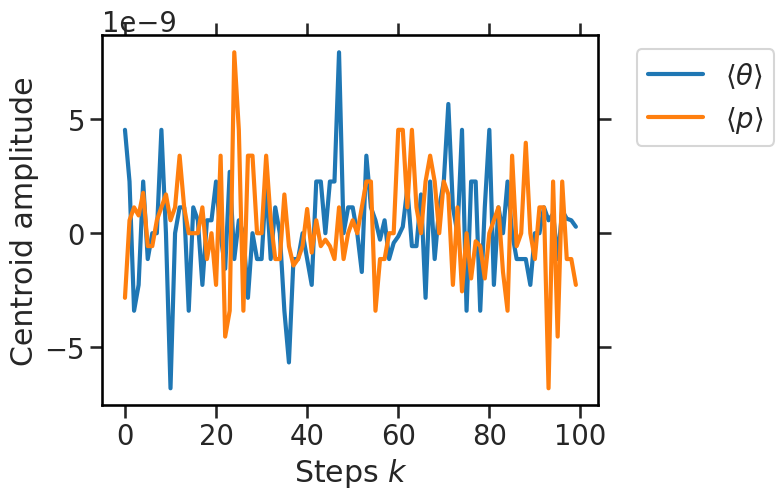

In [8]:
plt.plot(centroids_theta, label=r'$\langle\theta\rangle$')
plt.plot(centroids_p, label=r'$\langle p\rangle$')

plt.xlabel('Steps $k$')
plt.ylabel('Centroid amplitude')
plt.legend(bbox_to_anchor=(1.05, 1));

$\implies$ can you explain this?

<h2>Observations of RMS Sizes</h2>

Before we look at all "particles" (pendulums), check evolution of some distribution moments:

In [9]:
var_theta = 1/N * np.sum(results_thetas * results_thetas, axis=1)
var_p = 1/N * np.sum(results_ps * results_ps, axis=1)

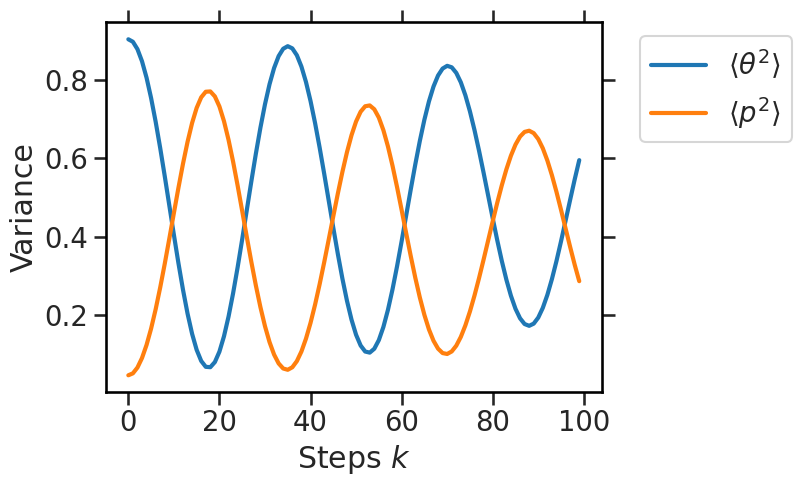

In [10]:
plt.plot(var_theta, label=r'$\langle\theta^2\rangle$')
plt.plot(var_p, label=r'$\langle p^2\rangle$')

plt.xlabel('Steps $k$')
plt.ylabel('Variance')
plt.legend(bbox_to_anchor=(1.05, 1));

$\implies$ can you explain this?

<h2>Mismatch of Distributions</h2>

Non-linearity of the pendulum equation: decreased oscillation frequency at larger amplitudes!
    
A) matched distribution:

<img src="./img/simtomo0.png" alt="simulated longitudinal phase space for matched beam" style="width:30%; margin: auto;" />

B) mismatched distribution:

<div style="margin:auto; width: 70%;">
<img src="./img/simtomo1.png" alt="simulated longitudinal phase space for mismatched beam before filamentation" style="width:43%; float:left; margin-top: 0;" />
    <div style="float:left; width:14%; text-align: center; vertical-align: middle; margin-top: 3em;">$\implies$</div>
<img src="./img/simtomo2.png" alt="simulated longitudinal phase space for mismatched beam during filamentation" style="width:43%; float:left; margin-top: 0;" />
</div>

<h2>Filamentation</h2>

- Liouville theorem (incompressible phase-space fluid) still valid, local density conserved
- occupied global phase-space area by beam seemingly enlarged
- reason: <b>filamentation</b> due to non-linearity: <br />
    $\implies$ non-linear potential $\longrightarrow$ oscillation frequency depends on amplitude $\implies$ anharmonicity
- consequence: rms emittance increases (in previous example: $\Delta\epsilon/\epsilon=30\%$)

<h2>Back to our pendulum simulation:</h2>

Observe distribution evolution over the $k$ steps:

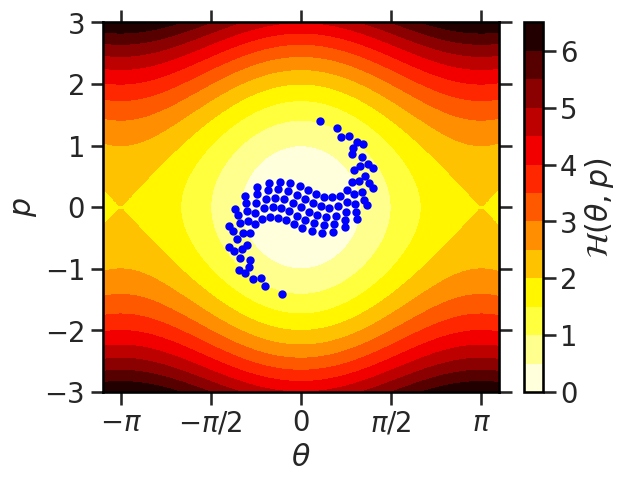

In [11]:
k = 99

plt.scatter(results_thetas[k], results_ps[k], c='b', marker='.')

plot_hamiltonian()

<h2>RMS Emittance Evolution</h2>

Let us compute the rms emittance for the pendulums (having subtracted the centroids),

$$\epsilon = \sqrt{\langle \theta^2\rangle \langle p^2\rangle - \langle \theta\,p\rangle^2}$$

In [12]:
def emittance(theta, p):
    N = len(theta)
    
    # subtract centroids
    theta = theta - 1/N * np.sum(theta)
    p = p - 1/N * np.sum(p)
    
    # compute Σ matrix entries
    theta_sq = 1/N * np.sum(theta * theta)
    p_sq = 1/N * np.sum(p * p)
    crossterm = 1/N * np.sum(theta * p)
    
    # determinant of Σ matrix
    epsilon = np.sqrt(theta_sq * p_sq - crossterm * crossterm)
    return epsilon

In [13]:
results_emit = np.zeros(n_steps, dtype=np.float32)

for k in range(n_steps):
    results_emit[k] = emittance(results_thetas[k], results_ps[k])

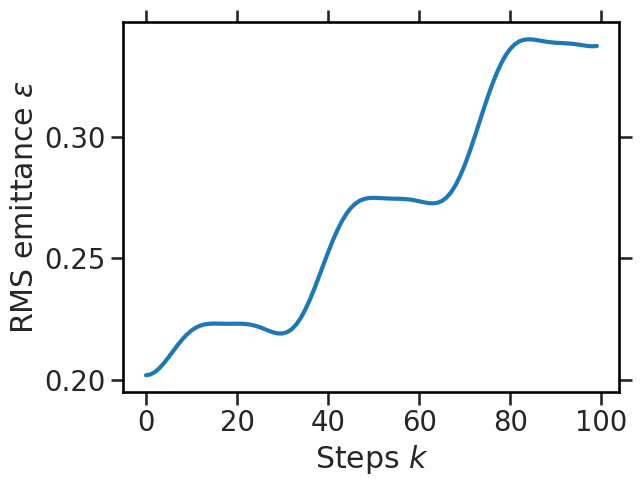

In [14]:
plt.plot(results_emit)

plt.xlabel('Steps $k$')
plt.ylabel('RMS emittance $\epsilon$');

$\implies$ rms emittance grows, macroscopic increase of "thermal energy"!

<h2>Microscopic Level?</h2>

What about Liouville theorem? 

$\implies$ For the symplectic integrator, still expect (and have) constant phase-space trajectory density!

<b>Exercise</b>: integrate around a small area and follow it during the simulation.

<!--
Let's check...

(thetas.min() - thetas.max()) * (ps.min() - ps.max())

i_bound = get_boundary_ids(thetas, ps)

k = 10

print (2 * np.trapz(results_thetas[k, i_bound], results_ps[k, i_bound]))
plt.scatter(results_thetas[k, i_bound], results_ps[k, i_bound])

set_axes()-->

<h2>Emittance vs. Linear Dynamics</h2>

$\implies$ What happens with the rms emittance in case of linear dynamics (absence of non-linearities)?

<b>Exercise</b>:
- Taylor-expand the sine function in the pendulum equations of motion
- cut after first order: $\sin\theta \approx \theta + \mathcal{O}(\theta^3)$
- re-run the simulation for this linear system (why is this system linear now?)
- observe the variances as well as emittance evolution!
- can you explain why the emittance behaves this way (in contrast to non-linear model?)

<h2>Note: Modelling error</h2>

Typical example: 
    
$\implies$ Taylor-expand potential $U\propto \sin\theta$ to a certain finite order

$\implies$ large amplitudes are behaved differently from original pendulum!

$\implies$ error in approximation $=$ <b>modelling error</b>

(in contrast to <b>discretisation error</b>, see last lecture)

<h2>Centroid offset in (Original) Pendulum</h2>

Consider again the non-linear pendulum: let us offset the initial centroid $\langle \theta\rangle$!

In [15]:
results_thetas2 = np.zeros((n_steps, N), dtype=np.float32)
results_thetas2[0] = thetas.flatten() + 0.1 * np.pi

results_ps2 = np.zeros((n_steps, N), dtype=np.float32)
results_ps2[0] = ps.flatten()

for k in range(1, n_steps):
    results_thetas2[k], results_ps2[k] = solve_leapfrog(results_thetas2[k - 1], results_ps2[k - 1])

$\implies$ will the rms emittance growth be smaller / equal / larger?

<h2>Observation of Centroids II</h2>

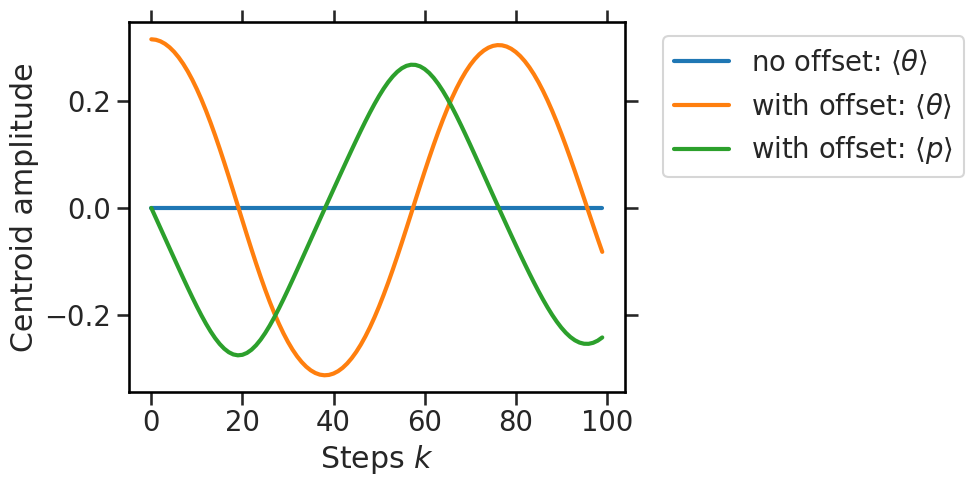

In [16]:
centroids_theta2 = 1/N * np.sum(results_thetas2, axis=1)
centroids_p2 = 1/N * np.sum(results_ps2, axis=1)

plt.plot(centroids_theta, label=r'no offset: $\langle\theta\rangle$')
plt.plot(centroids_theta2, label=r'with offset: $\langle\theta\rangle$')
plt.plot(centroids_p2, label=r'with offset: $\langle p\rangle$')

plt.xlabel('Steps $k$')
plt.ylabel('Centroid amplitude')
plt.legend(bbox_to_anchor=(1.05, 1));

<h2>RMS Emittance Evolution II</h2>

In [17]:
results_emit2 = np.zeros(n_steps, dtype=np.float32)

for k in range(n_steps):
    results_emit2[k] = emittance(results_thetas2[k], results_ps2[k])

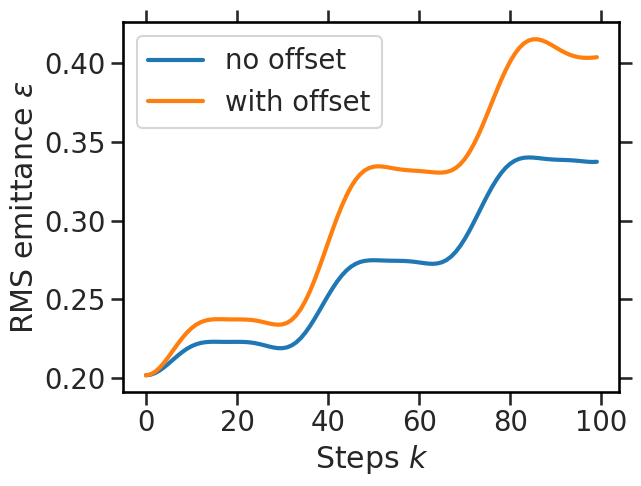

In [18]:
plt.plot(results_emit, label='no offset')
plt.plot(results_emit2, label='with offset')

plt.xlabel('Steps $k$')
plt.ylabel('RMS emittance $\epsilon$')
plt.legend();

<h2>Long-term Behaviour</h2>

In [19]:
n_steps = 3000

In [20]:
results_thetas3 = np.zeros((n_steps, N), dtype=np.float32)
results_thetas3[0] = thetas.flatten() + 0.1 * np.pi

results_ps3 = np.zeros((n_steps, N), dtype=np.float32)
results_ps3[0] = ps.flatten()

for k in range(1, n_steps):
    results_thetas3[k], results_ps3[k] = solve_leapfrog(results_thetas3[k - 1], results_ps3[k - 1])

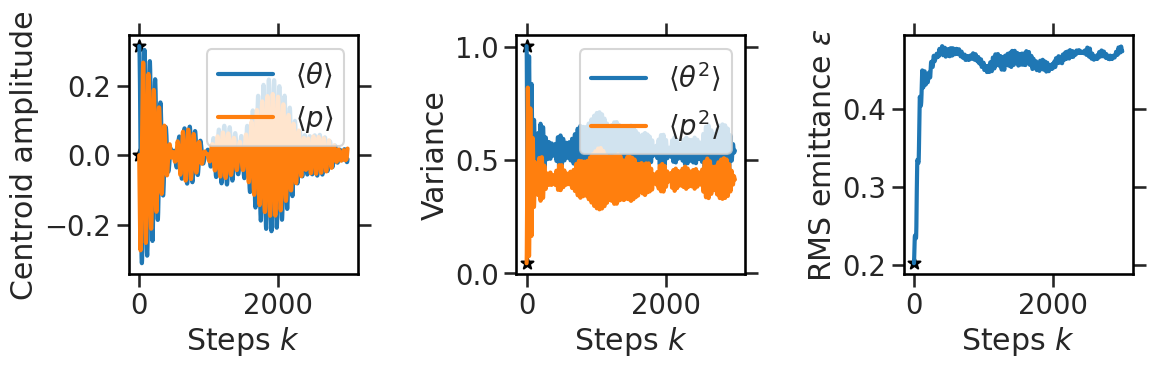

In [21]:
plot_macro_evolution(results_thetas3, results_ps3);

$\implies$ observations:
- oscillations of all moments dampen out until residual noise level
- emittance growth saturates rather quickly

<h2>Important Notes on RMS Emittance Evolution</h2>

Reminder of Basic Thermodynamic Principle: $\delta S \geq 0$
    
RMS emittance:
- constant or grows for conservative forces (closed systems)
- in accelerator systems, only ways to reduce / dampen emittance:
    - synchrotron radiation
    - electron cooling
    - stochastic cooling (Nobel prize: van de Meer)

<h2>Emittance Preservation</h2>

<img src="./img/cern-complex.png" alt="CERN accelerator complex" style="width: 40%; float:right; margin-left: 1em;" />

$\implies$ avoid <b>injection mismatch</b> when transferring<br /> beam between accelerators:
- centroid mismatch
- rms beam size mismatch

$\implies$ avoid resonances / instabilities

<div class="alert alert-block alert-info" style="text-align:center;">
$\implies$ preserve (energy-normalised) emittance to obtain small beams for experiments and accelerator aperture constraints! </div>

$\implies$ require <b>accurate numerical simulation models</b> for predictions!


<p style="clear: both; font-size: 10pt; text-align: right; float: right;">
<a href="http://cds.cern.ch/images/CERN-GRAPHICS-2022-001-1">image: CERN 2022</a></p>

<!--adiabatic invariant

only conjugate without acceleration! when accelerating, $\beta$ and $\gamma$ change $\implies$ transform coordinates to adiabatic acceleration frame $\implies$ normalised emittance-->

<h2>Representation of Particle Beam</h2>

<img src="./img/chao-representation.png" alt="representation of beams" style="width: 80%; margin: auto; margin-top: 1em;" />

<p style="font-size: 10pt; text-align: right;"><a href="https://cas.web.cern.ch/sites/default/files/lectures/thessaloniki-2018/cas2018chao.pdf">image: Alex Chao 2018 at the CAS</a></p>

<h2>Summing Up Concepts</h2>

- <b>non-linearities</b> in dynamical system $\implies$ oscillation frequency depends on amplitude $\implies$ <b>anharmonicity</b>
- microscopic: <b>Liouville</b> (density of phase-space trajectories conserved)
- macroscopic: <b>filamentation</b>
- <b>rms emittance</b>: macroscopic extent of distribution in phase space
- control of simulation errors: discretisation errors, modelling errors, numerical artefacts (see later!)

<div class="alert alert-block alert-success" style="text-align:center;">
$\implies$ rms emittance preservation in accelerators $\longleftrightarrow$ accurate modelling of non-linear accelerator system </div>

<h2>Continuous Pendulum: Linear Oscillation Frequency</h2>
    
Reminder:

Equation of motion: 
$$\frac{d^2\theta}{dt^2} + \frac{g}{L}\sin\theta = 0$$

for $\sin\theta\approx \theta$: $$\implies \frac{d^2\theta}{dt^2} + \underbrace{\frac{g}{L}}\limits_{\mathop{=}\omega^2}\theta = 0$$

During a time step $\Delta t=0.1$, the phase advance (in units of 2π) gives:

In [22]:
freq_theory = np.sqrt(1 / 1) * 0.1 / (2 * np.pi)
freq_theory

0.015915494309189534

<h2>Determining Oscillation Frequencies</h2>

Can we quantify the change of oscillation frequency towards larger amplitudes?

$\implies$ DFT: Discrete Fourier Transform technique

$$f_n = \sum\limits_{k=0}^{N_\mathrm{step}-1} \theta_{k}\,e^{-i2\pi\frac{n}{N_\mathrm{step}} k}$$

Obtain frequency components $f_n$ from signal $\theta_k$ recorded over $N_\mathrm{step}$ steps.

<h2>FFT: Efficient Algorithm for $N_{step}=2^\ell$</h2>

Fast Fourier Transform (FFT): among 10 most influential algorithms in 20th century!

- continuous splitting of DFT summation: 

$$ f_n = \sum\limits_{p=0}^{\frac{N_\mathrm{step}}{2}-1} \theta_{2p}\,e^{-i2\pi\frac{n}{N_\mathrm{step}}2p} + e^{-i2\pi\frac{n}{N_\mathrm{step}}} \sum\limits_{p=0}^{\frac{N_\mathrm{step}}{2}-1} \theta_{2p+1}\,e^{-i2\pi\frac{n}{N_\mathrm{step}}2p}$$

- exploiting symmetry identify of DFT: $f_{n+jN_mathrm{step}} = f_{n}$ for $j=0,1,2...$
- basic DFT: complexity $\mathcal{O}(N_\mathrm{step}^2)$
- vs. FFT: complexity $\mathcal{O}(N_\mathrm{step}\,\log_2 N_\mathrm{step})$

$\implies$ timing comparison DFT vs. FFT for $N_\mathrm{step}=10^9$ and 1 ns time per compute operation?

<h2>Employ FFT on Pendulum Motion</h2>

Observe two particles:

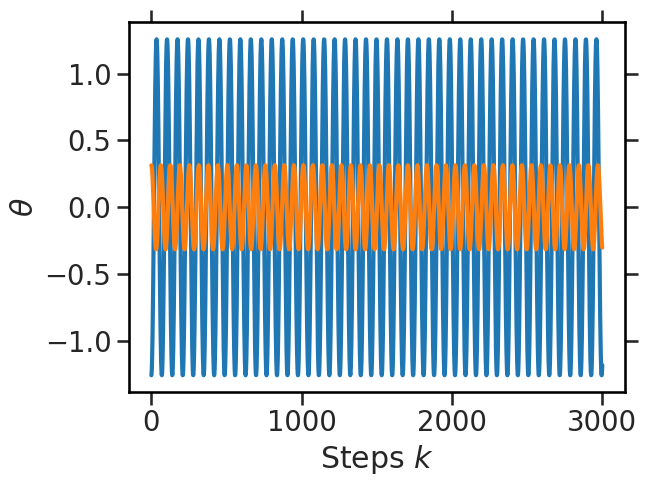

In [23]:
i1 = N // 2 - 10
i2 = N // 2

plt.plot(results_thetas3[:, i1])
plt.plot(results_thetas3[:, i2])
plt.xlabel('Steps $k$')
plt.ylabel(r'$\theta$');

Obtain the FFT spectra for both:

In [24]:
spec1 = np.fft.rfft(results_thetas3[:, i1])
spec2 = np.fft.rfft(results_thetas3[:, i2])

freq = np.fft.rfftfreq(n_steps)

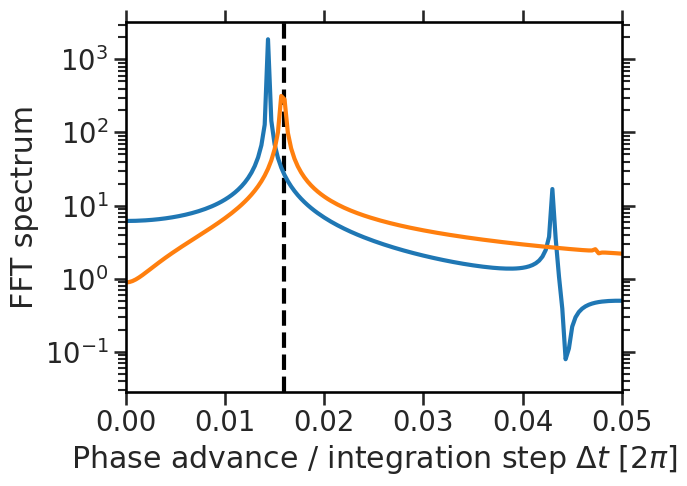

In [25]:
plt.plot(freq, np.abs(spec1))
plt.plot(freq, np.abs(spec2))
plt.axvline(freq_theory, c='k', zorder=0, ls='--')
plt.xlim(0, 0.05)
plt.xlabel('Phase advance / integration step $\Delta t$ [$2\pi$]')
plt.ylabel('FFT spectrum')
plt.yscale('log');

<h2>Frequency vs. Amplitude</h2>

Let us plot the maximum frequency vs. initial $\theta$ (where $p=0$):

In [26]:
specs = np.abs(np.fft.rfft(results_thetas3.T))

In [27]:
max_ids = np.argmax(specs, axis=1)
amplitudes = np.max(specs, axis=1)

(0.012, 0.016)

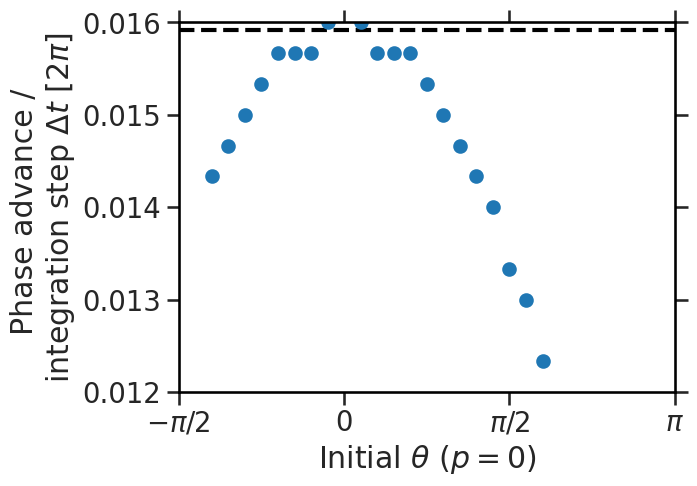

In [28]:
i_range = np.where(ps.flatten() == 0)[0]

plt.scatter(results_thetas3[0][i_range], freq[max_ids][i_range])

plt.axhline(freq_theory, c='k', ls='--', zorder=0)
plt.xticks([-np.pi/2, 0, np.pi/2, np.pi], [r"$-\pi/2$", "0", r"$\pi/2$", r"$\pi$"])
plt.xlabel(r'Initial $\theta$ ($p=0$)')
plt.ylabel('Phase advance / \n' + r'integration step $\Delta t$ [$2\pi$]');
plt.ylim(0.012, 0.016)

$\implies$ what is responsible for the step behaviour / finite resolution of the vertical values? How would you further increase the resolution in this plot?

<h2>The NAFF Algorithm</h2>

J. Laskar describes in 1989: "The Chaotic Motion of the Solar System: A Numerical Estimate of the Size of Chaotic Zones"

NAFF $=$ <b>N</b>umerical <b>A</b>nalysis of <b>F</b>undamental <b>F</b>requencies

$\implies$ <a href="https://arxiv.org/pdf/math/0305364.pdf">quasi-periodic decomposition</a>: <b>iterative</b> fitting of (not necessarily orthogonal) fundamental frequencies for numerical signal over finite time span.

In accelerator physics, sometimes find equivalent formulation as <a href="http://frs.home.cern.ch/frs/Source/other_tools/sussix/documentation/sussix_manual.pdf">SUSSIX algorithm</a>.

Usage:
- celestial mechanics
- particle accelerators
- atomic physics
- general dynamical system issues (Hamiltonian dynamics, chaos)

<h2>Frequency Precision</h2>
    
Distance between nearest FFT resolved frequencies:

$$\Delta f_\mathrm{FFT} = \frac{1}{N_\mathrm{step}\Delta t}$$

Same for NAFF with $n$ resolved frequencies:

$$\Delta f_\mathrm{NAFF} = \mathcal{O}\left(\frac{1}{(N_\mathrm{step}\Delta t)^\color{red}{n}}\right)$$

In [29]:
import PyNAFF

In [30]:
freqs_naff = []

for signal in results_thetas3.T[i_range]:
    freq_naff = PyNAFF.naff(signal, turns=n_steps - 1, nterms=1)
    try:
        freq_naff = freq_naff[0, 1]
    except IndexError:
        freq_naff = 0
    freqs_naff += [freq_naff]

freqs_naff = np.array(freqs_naff)

## PyNAFF::naff: Remove the DC component from the data (i.e. the mean).


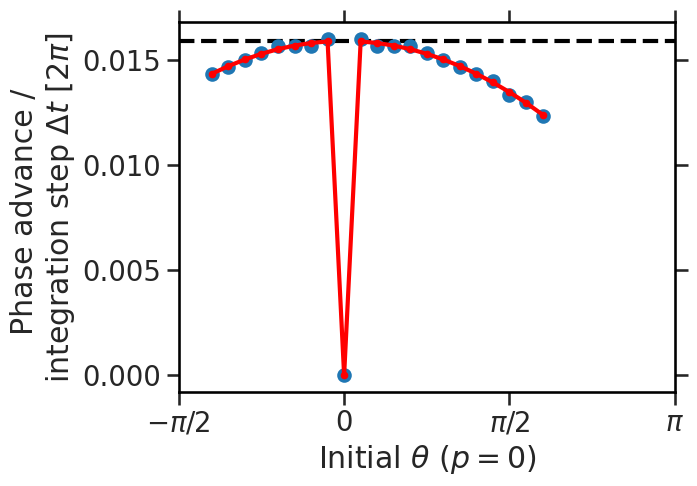

In [31]:
plt.scatter(results_thetas3[0][i_range], freq[max_ids][i_range])
plt.plot(results_thetas3[0][i_range], freqs_naff, c='r', marker='.')

plt.axhline(freq_theory, c='k', ls='--', zorder=0)
plt.xticks([-np.pi/2, 0, np.pi/2, np.pi], [r"$-\pi/2$", "0", r"$\pi/2$", r"$\pi$"])
plt.xlabel(r'Initial $\theta$ ($p=0$)')
plt.ylabel('Phase advance / \n' + r'integration step $\Delta t$ [$2\pi$]');

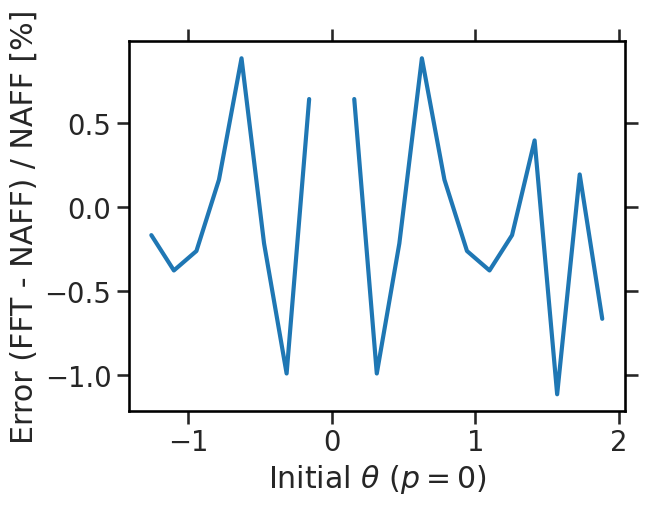

In [32]:
plt.plot(results_thetas3[0][i_range], 100 * (freq[max_ids][i_range] - freqs_naff) / freqs_naff)
plt.xlabel(r'Initial $\theta$ ($p=0$)')
plt.ylabel('Error (FFT - NAFF) / NAFF ' + r'[%]');

<h2>Summary</h2>

- statistical moments
- rms emittance
- filamentation: microscopic level Liouville vs. macroscopic emittance growth
- emittance preservation and injection mismatch
- modelling error (in addition to discretisation error last lecture)
- discrete frequency analysis: FFT and NAFF

<!--
- error accumulation:
    - discretisation schemes (e.g. non-symplecticity)
    - numerical artefacts: rounding and truncation
    - modelling
- accuracy requirements
-->